### <font color='red'> Project 2 : Buzz Prediction on Twitter

Project Description:
- There are two different datasets for Regression and Classification tasks. Right-most column in both the datasets is a dependent variable i.e. buzz.
- Data description files are also provided for both the datasets.
- Deciding which dataset is for which task is part of the project.
- Read data into Jupyter notebook, use pandas to import data into a data frame.
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.

Regression Task:
- Apply all the regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross-validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN regressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels. 
- Finally, find the best regressor for this dataset and train your model on the entire dataset using the best parameters and predict buzz for the test_set.

Classification Task:
- Decide about a good evaluation strategy and justify your choice.
- Find best parameters for the following classification models: KNN classification, Logistic Regression, Linear Support Vector Machine, Kernelized Support Vector Machine, Decision Tree. 
- Which model gives the best results?

Deliverables:
- Submit IPython notebook. Use markdown to provide inline comments for this project.
- Rename notebook with your group number and submit only one notebook. Before submitting, make sure everything runs as expected. To check that, restart the kernel (in the menubar, select Kernel > Restart) and then run all cells (in the menubar, select Cell > Run All).
- Visualization encouraged.

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- There is a high possibility that your classmate has also faced the same problem and knows the solution. So this is an effort to encourage collaborative learning, reducing mails for frequently asked queries and also making all the information available to everyone.
- Please check existing threads for your query before creating a new one. It goes without saying that do not share your code or complete solutions there.
- We will also answer queries there. We will not be answering any project related queries through the mail.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve

In [3]:
data = pd.read_csv('Twitter-Absolute-Sigma-500.data', header = None)

In [4]:
new_col = ["NCD","AI","AS(NA)","BL","NAC","AS(NAC)","CS","AT","NA","ADL","NAD"]
for i in range(len(data.columns)):
    if i < 7:
        data=data.rename(columns = {i:new_col[0] + '_'+ str(i)})
    elif i >= 7 and i < 14:
        data=data.rename(columns = {i:new_col[1] + '_'+ str(i-7)})
    elif i >= 14 and i < 21:
        data=data.rename(columns = {i:new_col[2] + '_'+ str(i-14)})
    elif i >= 21 and i < 28:
        data=data.rename(columns = {i:new_col[3] + '_'+ str(i-21)})
    elif i >= 28 and i < 35:
        data=data.rename(columns = {i:new_col[4] + '_'+ str(i-28)})
    elif i >= 35 and i < 42:
        data=data.rename(columns = {i:new_col[5] + '_'+ str(i-35)})
    elif i >= 42 and i < 49:
        data=data.rename(columns = {i:new_col[6] + '_'+ str(i-42)})
    elif i >= 49 and i < 56:
        data=data.rename(columns = {i:new_col[7] + '_'+ str(i-49)})
    elif i >= 56 and i < 63:
        data=data.rename(columns = {i:new_col[8] + '_'+ str(i-56)})
    elif i >= 63 and i < 70:
        data=data.rename(columns = {i:new_col[9] + '_'+ str(i-63)})
    elif i >= 70 and i < 77:
        data=data.rename(columns = {i:new_col[10] + '_'+ str(i-70)})
    else:
        data= data.rename(columns= {i:'Target'})

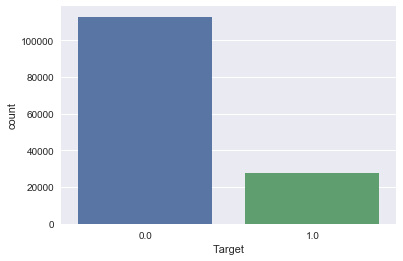

In [5]:
sns.set(style="darkgrid")
sns.countplot(data['Target'])

# Evaluation strategy

We have decided to use F1 score as an evaluation metric among Precision,recall, f1 score and roc-auc-score. Precision is the ratio of True positives to predicted positives and objective of it is to minimize false positives. recall is ratio of true positives and actual positives and high recall means minimum false positives. 

F1 Score is the ratio of Precision and Recall. As in our dataset we have uneven class distribution, precision and recall may give misleading results. Therefore we are using F1 Score as a comparison indicator between Precision and Recall numbers.


In [6]:
X = data.drop('Target',axis =1 )
y = data['Target']

In [7]:
from sklearn.model_selection import train_test_split
_, sample_data, _, sample_target = train_test_split(X, y, shuffle = True, test_size = 0.1)

In [95]:
X_train_org, X_test_org, y_train, y_test = train_test_split(sample_data, sample_target, random_state = 0, test_size = 0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [11]:
sample_dataframe = pd.concat([sample_data,sample_target], axis =1 )

c:\users\shubham\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
c:\users\shubham\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
c:\users\shubham\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\legend.py:652: UserWarning: Automatic legend placement (loc="best") not implemented for figure legend. Falling back on "upper right".
  warnings.warn('Automatic legend placement (loc="best") not '
c:\users\shubham\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is depre

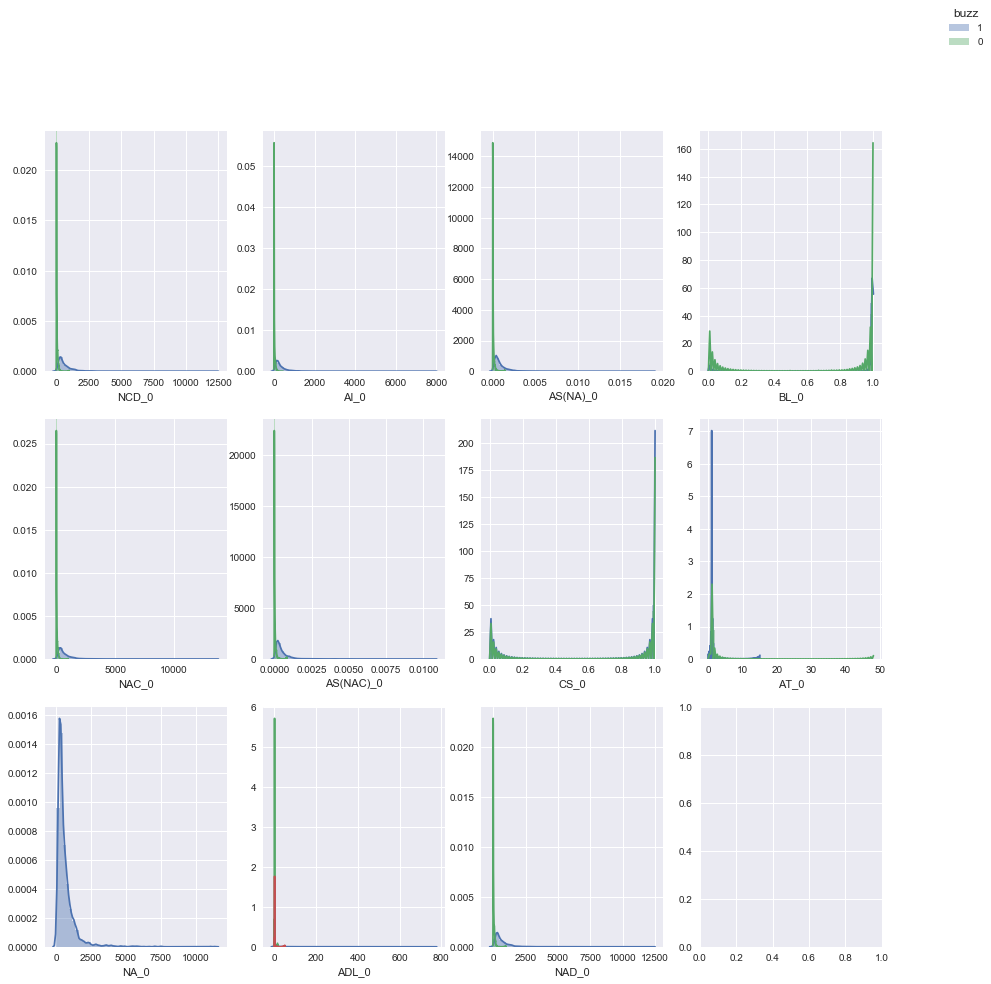

In [12]:
f, axes = plt.subplots(3, 4, figsize=(15, 15))

buzz = sample_dataframe[sample_dataframe['Target'] == 1]
no_buzz = sample_dataframe[sample_dataframe['Target'] == 0]

sns.distplot(buzz['NCD_0'],label = '1', ax=axes[0, 0])
sns.distplot(no_buzz['NCD_0'],label='0',ax=axes[0, 0])
f.legend(title='buzz',loc='best')

sns.distplot(buzz['AI_0'],label = '1',ax=axes[0,1])
sns.distplot(no_buzz['AI_0'],label='0',ax=axes[0,1])

sns.distplot(buzz['AS(NA)_0'],label = '1',ax=axes[0,2])
sns.distplot(no_buzz['AS(NA)_0'],label='0',ax = axes[0,2])

sns.distplot(buzz['BL_0'],label = '1',ax=axes[0,3])
sns.distplot(no_buzz['BL_0'],label='0',ax = axes[0,3])

sns.distplot(buzz['NAC_0'],label = '1',ax=axes[1,0])
sns.distplot(no_buzz['NAC_0'],label='0',ax = axes[1,0])

sns.distplot(buzz['AS(NAC)_0'],label = '1',ax=axes[1,1])
sns.distplot(no_buzz['AS(NAC)_0'],label='0',ax = axes[1,1])


sns.distplot(buzz['CS_0'],label = '1',ax=axes[1,2])
sns.distplot(no_buzz['CS_0'],label='0',ax=axes[1,2])

sns.distplot(buzz['AT_0'],label = '1',ax=axes[1,3])
sns.distplot(no_buzz['AT_0'],label='0',ax = axes[1,3])

sns.distplot(buzz['NA_0'],label = '1',ax=axes[2,0])
sns.distplot(no_buzz['NA_0'],label='0',ax = axes[2,1])

sns.distplot(buzz['ADL_0'],label = '1',ax=axes[2,1])
sns.distplot(no_buzz['ADL_0'],label='0',ax = axes[2,1])

sns.distplot(buzz['NAD_0'],label = '1',ax=axes[2,2])
sns.distplot(no_buzz['NAD_0'],label='0',ax = axes[2,2])

In [13]:
corr = sample_dataframe.corr()
corr

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,Target
NCD_0,1.000000,0.954470,0.916514,0.902848,0.946306,0.963076,0.915852,0.918032,0.870144,0.830217,...,0.005032,-0.008480,0.999994,0.954550,0.916666,0.902975,0.946401,0.963198,0.916160,0.553258
NCD_1,0.954470,1.000000,0.925080,0.887293,0.941601,0.953697,0.917588,0.876412,0.914535,0.839197,...,0.003191,-0.007939,0.954404,0.999995,0.925195,0.887342,0.941590,0.953770,0.917818,0.522230
NCD_2,0.916514,0.925080,1.000000,0.930371,0.936465,0.930183,0.887987,0.860254,0.858194,0.924462,...,0.004099,-0.008079,0.916417,0.925013,0.999995,0.930491,0.936496,0.930216,0.888184,0.530059
NCD_3,0.902848,0.887293,0.930371,1.000000,0.942050,0.921678,0.857692,0.840329,0.822752,0.847891,...,0.004164,-0.008589,0.902715,0.887179,0.930389,0.999995,0.942128,0.921707,0.857875,0.542815
NCD_4,0.946306,0.941601,0.936465,0.942050,1.000000,0.955624,0.901252,0.866817,0.857665,0.851670,...,0.004691,-0.008090,0.946281,0.941609,0.936563,0.942104,0.999995,0.955743,0.901499,0.542039
NCD_5,0.963076,0.953697,0.930183,0.921678,0.955624,1.000000,0.916615,0.891453,0.882529,0.853238,...,0.002902,-0.008823,0.963014,0.953688,0.930288,0.921747,0.955631,0.999996,0.916850,0.543487
NCD_6,0.915852,0.917588,0.887987,0.857692,0.901252,0.916615,1.000000,0.840257,0.829874,0.799945,...,0.001903,-0.009602,0.915757,0.917548,0.888037,0.857724,0.901220,0.916640,0.999997,0.522077
AI_0,0.918032,0.876412,0.860254,0.840329,0.866817,0.891453,0.840257,1.000000,0.945357,0.909350,...,0.008257,-0.008217,0.918007,0.876509,0.860397,0.840416,0.866890,0.891541,0.840522,0.564316
AI_1,0.870144,0.914535,0.858194,0.822752,0.857665,0.882529,0.829874,0.945357,1.000000,0.912981,...,0.005431,-0.007799,0.870116,0.914574,0.858345,0.822797,0.857680,0.882598,0.830093,0.536408
AI_2,0.830217,0.839197,0.924462,0.847891,0.851670,0.853238,0.799945,0.909350,0.912981,1.000000,...,0.006771,-0.007523,0.830148,0.839169,0.924471,0.847996,0.851706,0.853270,0.800131,0.524633


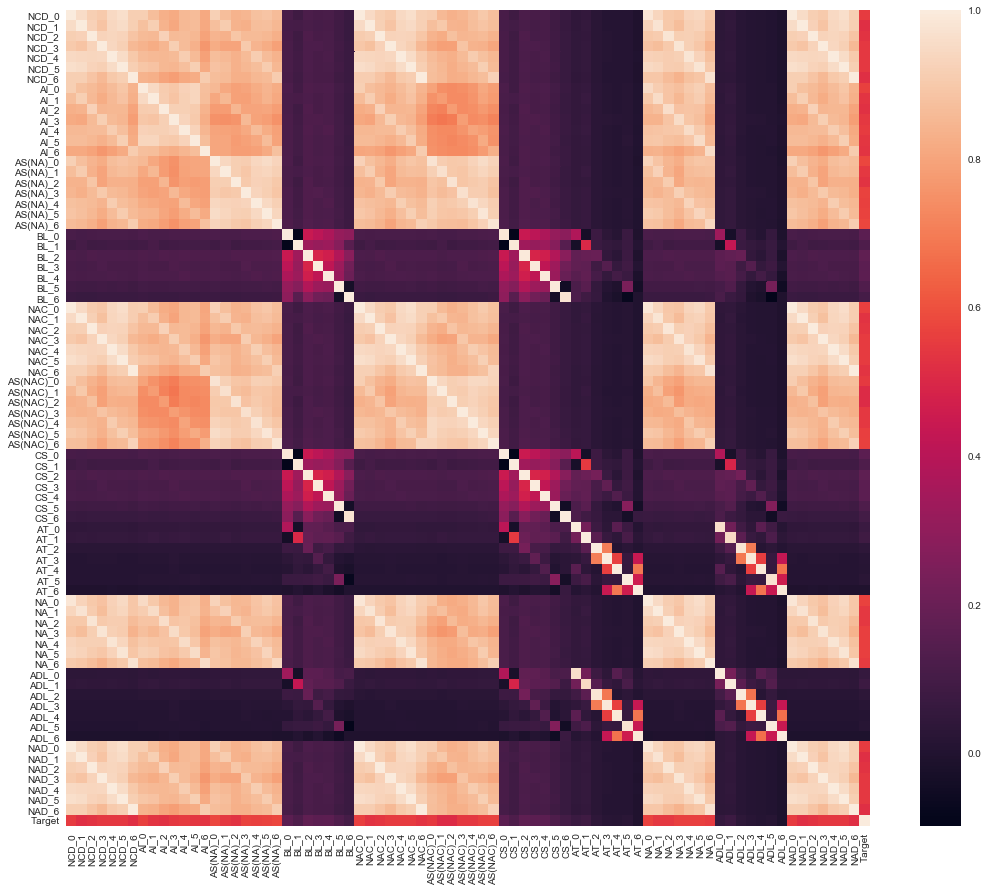

In [14]:
fig, ax = plt.subplots(figsize=(18,15))
sns.heatmap(corr, ax=ax)

# K-NN

In [22]:
param_grid = [{'n_neighbors': [1,2,3,4,5,6,7,8]}]

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid,scoring = 'f1', cv=10)
grid_knn.fit(X_train, y_train)
print(grid_knn.best_params_)
print(grid_knn.best_score_)

{'n_neighbors': 7}
0.903613537210741


In [102]:
print('Train score{: .3f}'.format(grid_knn.score(X_train, y_train)))
print('Test score{: .3f}'.format(grid_knn.score(X_test,y_test)))

knn_f1_score =  grid_knn.score(X_test,y_test)


Train score 0.920
Test score 0.906


0.9058823529411765

In [24]:
confusion_matrix(y_test, grid_knn.predict(X_test))

array([[2257,   35],
       [  61,  462]], dtype=int64)

In [25]:
print(classification_report(y_test, grid_knn.predict(X_test)))

             precision    recall  f1-score   support

        0.0       0.97      0.98      0.98      2292
        1.0       0.93      0.88      0.91       523

avg / total       0.97      0.97      0.97      2815



# Logistic Regression

In [29]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
log_grid = GridSearchCV(LogisticRegression(penalty='l2'), param_grid, scoring = 'f1')
log_grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [30]:
print(log_grid.best_params_)
print(log_grid.best_score_)

{'C': 1}
0.9109314996340654


In [103]:
print('Train score{: .3f}'.format(log_grid.score(X_train,y_train)))
print('Test score{: .3f}'.format(log_grid.score(X_test,y_test)))

log_reg_f1_score = log_grid.score(X_test,y_test)

Train score 0.916
Test score 0.907


In [32]:
log_grid.score(X_test,y_test)

0.9067713444553485

In [33]:
confusion_matrix(y_test, log_grid.predict(X_test))

array([[2258,   34],
       [  61,  462]], dtype=int64)

In [34]:
print(classification_report(y_test, log_grid.predict(X_test)))

             precision    recall  f1-score   support

        0.0       0.97      0.99      0.98      2292
        1.0       0.93      0.88      0.91       523

avg / total       0.97      0.97      0.97      2815



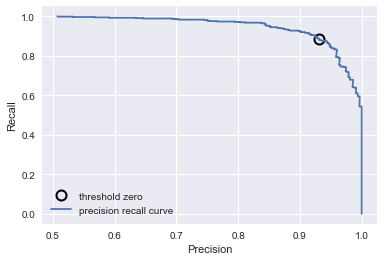

In [98]:
precision, recall, thresholds = precision_recall_curve(y_test, log_grid.decision_function(X_test))

close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

# Linear SVM

In [38]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search_linsvm = GridSearchCV(SVC(kernel = 'linear'), param_grid,scoring = 'f1', cv=5)

In [39]:
grid_search_linsvm.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [40]:
print(grid_search_linsvm.best_params_)
print(grid_search_linsvm.best_score_)

{'gamma': 0.001, 'C': 1}
0.910836318193977


In [104]:
print('train score{: .3f}'.format(grid_search_linsvm.score(X_train, y_train)))
print('test score{: .3f}'.format(grid_search_linsvm.score(X_test, y_test)))

linsvm_f1_score  = grid_search_linsvm.score(X_test, y_test)

train score 0.917
test score 0.905


In [42]:
confusion_matrix(y_test, grid_search_linsvm.predict(X_test))

array([[2251,   41],
       [  57,  466]], dtype=int64)

In [43]:
print(classification_report(y_test, grid_search_linsvm.predict(X_test)))

             precision    recall  f1-score   support

        0.0       0.98      0.98      0.98      2292
        1.0       0.92      0.89      0.90       523

avg / total       0.96      0.97      0.96      2815



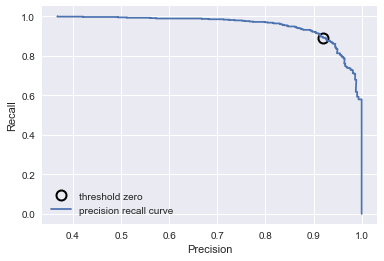

In [99]:
precision, recall, thresholds = precision_recall_curve(y_test, grid_search_linsvm.decision_function(X_test))

close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

# Kernalized SVM

In [47]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search_Kernel = GridSearchCV(SVC(kernel = 'rbf'), param_grid,scoring = 'f1', cv=5)

In [48]:
grid_search_Kernel.fit(X_train, y_train)

c:\users\shubham\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\shubham\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\shubham\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\shubham\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\shubham\ana

c:\users\shubham\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\shubham\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\shubham\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\shubham\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\shubham\ana

c:\users\shubham\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\shubham\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\shubham\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\shubham\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\shubham\ana

c:\users\shubham\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\shubham\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\shubham\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\shubham\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\shubham\ana

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [49]:
grid_search_Kernel.best_params_

{'C': 10, 'gamma': 0.01}

In [105]:
print('Train score:{: .3f}'.format(grid_search_Kernel.score(X_train, y_train)))
print('Test score{: .3f}'.format(grid_search_Kernel.score(X_test, y_test)))

kernel_f1_score = grid_search_Kernel.score(X_test, y_test)

Train score: 0.922
Test score 0.904


In [51]:
confusion_matrix(y_test, grid_search_Kernel.predict(X_test))

array([[2248,   44],
       [  55,  468]], dtype=int64)

In [53]:
print(classification_report(y_test, grid_search_Kernel.predict(X_test)))

             precision    recall  f1-score   support

        0.0       0.98      0.98      0.98      2292
        1.0       0.91      0.89      0.90       523

avg / total       0.96      0.96      0.96      2815



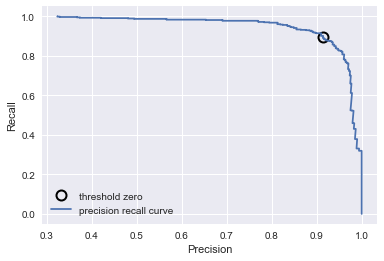

In [100]:
precision, recall, thresholds = precision_recall_curve(y_test, grid_search_Kernel.decision_function(X_test))

close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

# Decision Tree¶

In [58]:
tuned_parameters = [{'max_depth': [1,2,3,4,5,6,7,8]}]

dectree = GridSearchCV(DecisionTreeClassifier(), tuned_parameters,scoring = 'f1', cv=10)
dectree.fit(X_train, y_train)
print(dectree.best_params_)
print(dectree.best_score_)

{'max_depth': 4}
0.9082092564418409


In [106]:
print("Accuracy on training set: {:.3f}".format(dectree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dectree.score(X_test, y_test)))

dectree_f1_score = dectree.score(X_test, y_test)

Accuracy on training set: 0.922
Accuracy on test set: 0.896


In [60]:
confusion_matrix(y_test, dectree.predict(X_test))

array([[2229,   63],
       [  47,  476]], dtype=int64)

In [61]:
print(classification_report(y_test, dectree.predict(X_test)))

             precision    recall  f1-score   support

        0.0       0.98      0.97      0.98      2292
        1.0       0.88      0.91      0.90       523

avg / total       0.96      0.96      0.96      2815



# Comparing all models

In [65]:
score = pd.DataFrame([knn_f1_score,log_reg_f1_score,linsvm_f1_score,kernel_f1_score,dectree_f1_score], columns = ['F1-Score'], index = ['KNN','Log-Reg','Lin-SVM','Kernel-SVM','Dec-Tree'])

In [66]:
score

,F1-Score
KNN,0.905882
Log-Reg,0.906771
Lin-SVM,0.904854
Kernel-SVM,0.904348
Dec-Tree,0.896422


# Best Model

As Logistic regression is predicting with highest f1 score we are running logistic regression model on complete dataset

# Running Model on complete data

In [68]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0, test_size = 0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

# Logistic regression

In [85]:
final_logreg = LogisticRegression(C= 1)

final_logreg.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [86]:
print('train score{: .3f}'.format(final_logreg.score(X_train, y_train)))
print('test score{: .3f}'.format(final_logreg.score(X_test, y_test)))

train score 0.967
test score 0.964


In [88]:
confusion_matrix(y_test, final_logreg.predict(X_test))

array([[22191,   347],
       [  657,  4947]], dtype=int64)

In [89]:
print(classification_report(y_test, final_logreg.predict(X_test)))

             precision    recall  f1-score   support

        0.0       0.97      0.98      0.98     22538
        1.0       0.93      0.88      0.91      5604

avg / total       0.96      0.96      0.96     28142



In [90]:
final_logreg_f1_score = f1_score(y_test, final_logreg.predict(X_test))

In [91]:
final_logreg_f1_score

0.9078730042209581

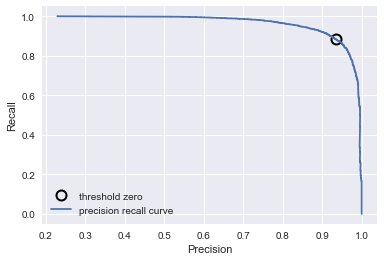

In [92]:
precision, recall, thresholds = precision_recall_curve(y_test, final_logreg.decision_function(X_test))

close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

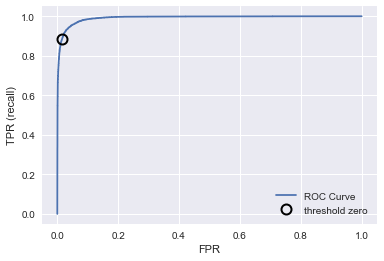

In [93]:
fpr, tpr, thresholds = roc_curve(y_test, final_logreg.decision_function(X_test))

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

# Linear SVM

In [69]:
final_linsvm = SVC(gamma = 0.001, C= 1,kernel = 'linear')
final_linsvm.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [72]:
print('train score{: .3f}'.format(final_linsvm.score(X_train, y_train)))
print('test score{: .3f}'.format(final_linsvm.score(X_test, y_test)))

train score 0.967
test score 0.965


In [73]:
confusion_matrix(y_test, final_linsvm.predict(X_test))

array([[22180,   358],
       [  626,  4978]], dtype=int64)

In [75]:
print(classification_report(y_test, final_linsvm.predict(X_test)))

             precision    recall  f1-score   support

        0.0       0.97      0.98      0.98     22538
        1.0       0.93      0.89      0.91      5604

avg / total       0.96      0.97      0.96     28142



In [77]:
final_linsvm_f1_score = f1_score(y_test, final_linsvm.predict(X_test))

In [78]:
final_linsvm_f1_score

0.910054844606947

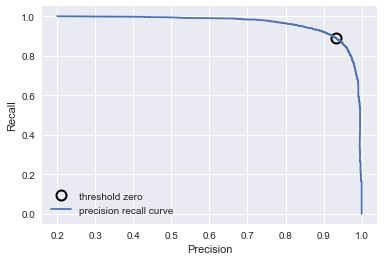

In [81]:
precision, recall, thresholds = precision_recall_curve(y_test, final_linsvm.decision_function(X_test))

close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

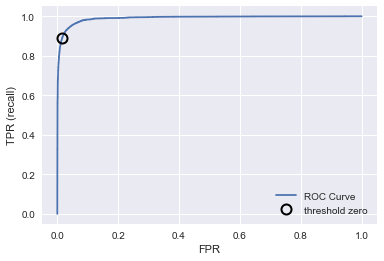

In [82]:
fpr, tpr, thresholds = roc_curve(y_test, final_linsvm.decision_function(X_test))

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

# Conclusion

In this project we built classification models on sample dataset to predict presence of buzz. We analysed data, plotted correlation plot, distribution plot of few variables.

We evaluated classification model on F1-score. As logistic regression and linear support vector machine predicted target variable with maximum f1 score, we implemented both models on whole dataset and calculated f1 score.